In [29]:
import numpy as np
from numpy.linalg import eig
from timeit import timeit
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.linalg

In [22]:
def power_iteration(A, max_iter=2000, epsilon=1e-10, log=False):
    x = np.random.random_sample(size=A.shape[0])
    x_prev = 0
    i = 0
    while i < max_iter and np.max(abs(x - x_prev)) > epsilon:
        x_prev = x
        i += 1
        x = A @ x
        eigenvalue = np.linalg.norm(x, ord=np.inf)
        x /= eigenvalue
        
    eigenvector = x / np.linalg.norm(x)
    if log:
        print(f"iterations = {i}")
    return eigenvalue, eigenvector

In [24]:
def sym_array(n):
    A = np.random.rand(n, n) - 0.5
    A = (A + A.T)/2
    return A

A = sym_array(5)
print(power_iteration(A, log=True))
val, vec = eig(A)
i = np.argmax(abs(val))
print(val[i], vec[:,i])

iterations = 130
(0.6706778897010679, array([ 0.25620474, -0.22764726,  0.84993854, -0.08595081,  0.39083602]))
0.6706778897294176 [ 0.25620474 -0.22764726  0.84993854 -0.08595081  0.39083602]


In [21]:
def compare_with_library(A, fun=power_iteration):
    _, my_vec = power_iteration(A)
    val, lib_arr = eig(A)
    idx = np.argmax(abs(val))
    lib_vec =  lib_arr[:,idx]
    return np.allclose(my_vec, lib_vec, atol=1e-4) or np.allclose(-my_vec, lib_vec, atol=1e-4) 

def test(fun):
    for i in range(10):
        A = sym_array(50)
        print(f"test passed? {compare_with_library(A, fun=fun)}")
        
test(power_iteration)

test passed? True
test passed? True
test passed? True
test passed? True
test passed? True
test passed? True
test passed? True
test passed? True
test passed? True
test passed? True


100%|██████████| 7/7 [01:41<00:00, 14.46s/it]


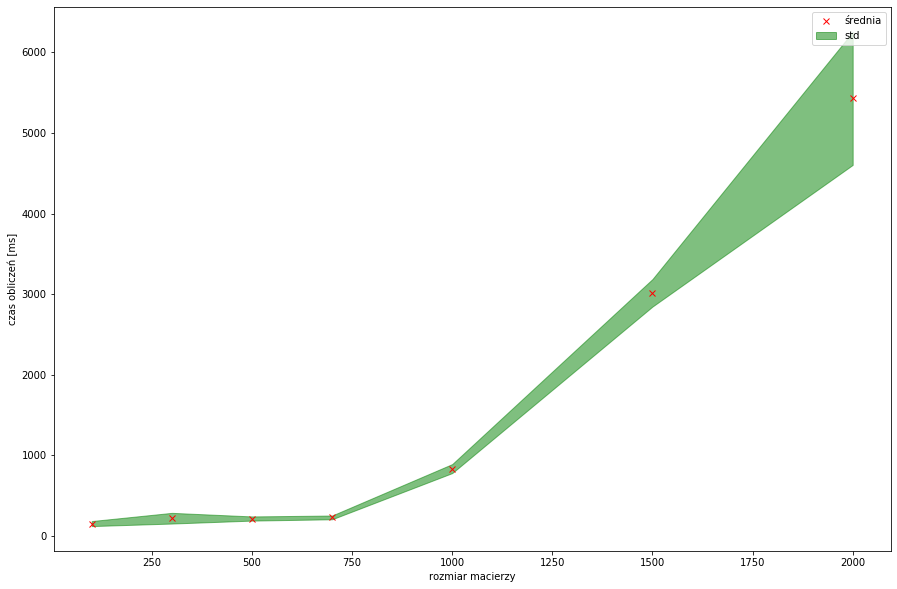

In [19]:
def plot_time(fun):
    times = []
    sizes = [100, 300, 500, 700, 1000, 1500, 2000]
    for n in tqdm(sizes):
        A = sym_array(n)
        t = [timeit(lambda: fun(A), number=1) * 1000 for i in range(10)]
        times.append((np.mean(t), np.std(t)))

    times = np.array(times)
    mean =  times[:, 0]
    std =  times[:, 1]
    plt.figure(figsize=(15,10))
    plt.xlabel("rozmiar macierzy")
    plt.ylabel("czas obliczeń [ms]")
    plt.plot(sizes, mean, "x",color="r", label="średnia")
    plt.fill_between(sizes, mean-std, mean+std, color="g", alpha=0.5, label="std")
    plt.legend()
    plt.show()
    
plot_time(power_iteration)

In [102]:
def reverse_power_iteration(A, max_iter=2000, epsilon=1e-10, log=False, sigma=2):
    N = A.shape[0]
    x = np.random.random_sample(size=N)
    I =  np.identity(N)
    
    x_prev = 0 
    i = 0
    while i < max_iter and np.max(abs(x - x_prev)) > epsilon:
        x_prev = -x
        P, L, U = scipy.linalg.lu(A - sigma * I)
        y = scipy.linalg.solve_triangular(L, P @ x, lower=True)
        x = scipy.linalg.solve_triangular(U, y)
        i += 1
        
        x /= np.linalg.norm(x, ord=np.inf)
    
    eigenvalue = np.linalg.norm(A @ x) / np.linalg.norm(x)
    eigenvector = x / np.linalg.norm(x)
    if log:
        print(f"iterations = {i}")
    return eigenvalue, eigenvector

A = sym_array(4)
print(reverse_power_iteration(A, log=True, sigma=5))
val, arr = eig(A)
print(val)
print(arr)

iterations = 434
(0.5428496918414699, array([-0.23119781,  0.80911913,  0.53878493,  0.03980697]))
[-0.45481734  0.07089045  0.33713728  0.54284969]
[[-0.55128171  0.45611097 -0.6592411   0.23119781]
 [ 0.14212685 -0.19337855 -0.53640556 -0.80911913]
 [-0.49831043  0.43037936  0.52551985 -0.53878493]
 [ 0.6538923   0.75454696 -0.03871877 -0.03980697]]


In [100]:
A = sym_array(100)
val, vec = reverse_power_iteration(A, log=True, sigma=5)
lib_val, lib_arr = eig(A)
idx = np.argmin(abs(lib_val - val))
np.allclose(vec, lib_arr[:, idx]) or np.allclose(-vec, lib_arr[:, idx])

iterations = 286


True

In [157]:
def rayleight_quotient(A, max_iter=2000, epsilon=1e-10, log=False):
    N = A.shape[0]
    x = np.random.random_sample(size=N)
    I =  np.identity(N)
    
    x_prev = 0 
    i = 0
    while i < max_iter and np.max(abs(x - x_prev)) > epsilon:
        x_prev = -x
        sigma = (x @ A @ x.T) / (x @ x.T)
        P, L, U = scipy.linalg.lu(A - sigma * I)
        y = scipy.linalg.solve_triangular(L, P @ x, lower=True)
        x = scipy.linalg.solve_triangular(U, y)
        i += 1
        
        x /= np.linalg.norm(x, ord=np.inf)
    
    eigenvalue = np.linalg.norm(A @ x) / np.linalg.norm(x)
    eigenvector = x / np.linalg.norm(x)
    if log:
        print(f"iterations = {i}")
    return eigenvalue, eigenvector

A = sym_array(4)
print(rayleight_quotient(A, log=True))
val, arr = eig(A)
print(val)
print(arr)

iterations = 2000
(0.10681636575798031, array([0.77188502, 0.56515311, 0.20619378, 0.20562006]))
[ 0.81063433  0.10681637 -0.25284783 -0.30155323]
[[-0.61022199  0.77188502 -0.178326   -0.00474183]
 [ 0.65227805  0.56515311  0.22621669 -0.45162077]
 [ 0.44685539  0.20619378 -0.65194357  0.57686564]
 [ 0.04982703  0.20562006  0.70142386  0.680619  ]]


In [141]:
A = sym_array(100)
val, vec = rayleight_quotient(A, log=True)
lib_val, lib_arr = eig(A)
idx = np.argmin(abs(lib_val - val))
print(val, lib_val[idx])
np.allclose(vec, lib_arr[:, idx], atol=1e-4) or np.allclose(-vec, lib_arr[:, idx], atol=1e-4)

iterations = 5
0.1759893339795928 0.17598933397959268


True

In [158]:
A = sym_array(100)

In [159]:
for i in range(5):
    _,_ = power_iteration(A, log=True)

iterations = 2000
iterations = 2000
iterations = 2000
iterations = 2000
iterations = 2000


In [160]:
for i in range(5):
    _,_ = rayleight_quotient(A, log=True)

iterations = 13
iterations = 7
iterations = 7
iterations = 9
iterations = 12


In [161]:
%%timeit
 power_iteration(A)

143 ms ± 28.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [162]:
%%timeit
 rayleight_quotient(A)

30.6 ms ± 5.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
